In [95]:
# Import packages
import sys
!{sys.executable} -m pip install world_bank_data
!{sys.executable} -m pip install xlrd
import pandas as pd
import world_bank_data as wb
from datetime import datetime
import matplotlib.pyplot as plt
import numpy as np
import calendar
%matplotlib inline

from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

     |████████████████████████████████| 112kB 13.3MB/s eta 0:00:01


### 1. Get Data from John Hopkins 

In [19]:
# Loading Covid 19 Data
public_url = 'https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv'
corona_data = pd.read_csv(public_url)
corona_data.drop(['Lat','Long','Province/State'],axis=1)
countries = sorted(corona_data['Country/Region'].unique())
country_data = corona_data.groupby('Country/Region').sum()
country_data = country_data.drop(['Lat','Long'],axis=1)
country_data = country_data.rename(columns={'Country/Region':'Country'},index={'US':'United States'})

### 2. Get Data from the World Bank

In [151]:
# Get GDP data
GDP = pd.DataFrame(wb.get_series('NY.GDP.MKTP.CD',mrv=1))
GDP = GDP.droplevel(level=[1,2]) # Droping multi level indexing

# Get gini Index
Gini = pd.DataFrame(wb.get_series('SI.POV.GINI',date = '2010'))
Gini = Gini.droplevel(level=[1,2]) # Droping multi level indexing

# Get population data
Pop = pd.DataFrame(wb.get_series('SP.POP.TOTL',mrv=1))
Pop = Pop.droplevel(level=[1,2]) # Droping multi level indexing

# Get Health System Data
Health = pd.DataFrame(wb.get_series('SH.MED.BEDS.ZS',date = '2010'))
Health = Health.droplevel(level=[1,2]) # Droping multi level indexing

# Get Density Data
Dens = pd.DataFrame(wb.get_series('EN.POP.DNST',mrv=1))
Dens = Dens.droplevel(level=[1,2])

# Get Trade data
Trade = pd.DataFrame(wb.get_series('NE.TRD.GNFS.ZS',mrv=1))
Trade = Trade.droplevel(level=[1,2])

### Religion Data

In [203]:
religion = pd.read_excel('religious-diversity-index.xlsx')

RDI score, higher diversity

In [204]:
#Europe
europe = pd.read_csv('Europe.csv')
europe_names = list(europe['State'])

#Asia
asia = pd.read_csv('Asia.csv')
asia_names = list(asia['Name'])

#South America
southamerica = pd.read_csv('SouthAmerica.csv')
southamerica_names = list(southamerica['Country'])

#North America
northamerica = pd.read_csv('NorthAmerica.csv')
northamerica_names = list(northamerica['Country'])

#Oceania
oceania = pd.read_csv('Oceania.csv')
oceania_names = list(oceania['Country'])

#Africa
africa = pd.read_csv('Africa.csv')
africa_names = list(africa['Country'])

In [205]:
#Continent
Continent = np.empty(len(religion), dtype='str')
Country = list(religion['Country'])

for i, c in enumerate(Country):
    if c in europe_names:
        Continent[i] = 'E'
    elif c in asia_names:
        Continent[i] = 'A'
    elif c in northamerica_names:
        Continent[i] = 'NA'
    elif c in southamerica_names:
        Continent[i] = 'SA'
    elif c in oceania_names:
        Continent[i] = 'O'
    elif c in africa_names:
        Continent[i] = 'AF'
    else:
        pass

religion.insert(1, "Continent", Continent.reshape(-1,1), True) 

In [206]:
religion[religion['Continent']=='']

,Country,Continent,RDI,Percent Christian,Percent Muslim,Percent Unaffiliated,Percent Hindu,Percent Buddhist,Percent Folk Religions,Percent Other Religions,Percent Jewish,2010 Country Population
32,Burma (Myanmar),,4.0,0.078,0.04,0.005,0.017,0.801,0.058,0.002,< 0.1%,47960000
41,Channel Islands,,2.9,0.852,< 0.1%,0.142,< 0.1%,< 0.1%,< 0.1%,0.003,< 0.1%,150000
64,Faeroe Islands,,0.4,0.98,< 0.1%,0.017,< 0.1%,< 0.1%,< 0.1%,0.003,< 0.1%,50000
77,Gibraltar,,2.4,0.888,0.04,0.029,0.018,< 0.1%,< 0.1%,0.003,0.021,30000
85,Guinea Bissau,,7.5,0.197,0.451,0.043,< 0.1%,< 0.1%,0.309,< 0.1%,< 0.1%,1520000
89,Hong Kong,,7.2,0.143,0.018,0.561,0.004,0.132,0.128,0.015,< 0.1%,7050000
97,Isle of Man,,3.1,0.841,0.002,0.154,0.002,< 0.1%,< 0.1%,< 0.1%,< 0.1%,80000
119,Macau,,6.8,0.072,0.002,0.154,< 0.1%,0.173,0.589,0.01,< 0.1%,540000
143,Netherlands Antilles,,1.3,0.939,0.002,0.033,0.002,0.005,0.012,0.003,0.003,200000
156,Palestinian territories,,0.5,0.024,0.976,< 0.1%,< 0.1%,< 0.1%,< 0.1%,< 0.1%,< 0.1%,4040000


### 3. Get downloaded data

In [92]:
# Economist businnes unit
df = pd.read_excel('Data/_EIU-Democracy Indices - Dataset - v3.xlsx')
year = df['time'] == 2018
DEM = df[year]
DEM = DEM.drop(['geo','a','b','c','d','e','time','f'],axis = 1)
DEM = DEM.set_index('name')
DEM = DEM.rename(columns={'name':'Country'})

# Continent data
Cont = pd.read_csv('Data/Countries-Continents.csv')
Cont = Cont.set_index('Country')
Cont = Cont.rename(index={'US':'United States'})

### 4. Merge all data

In [99]:
allData = country_data.join([GDP,Gini,DEM,Pop,Health,Dens,Trade,Cont])
allData = allData.dropna()

### 5. Plot

a. Confirmed Cases

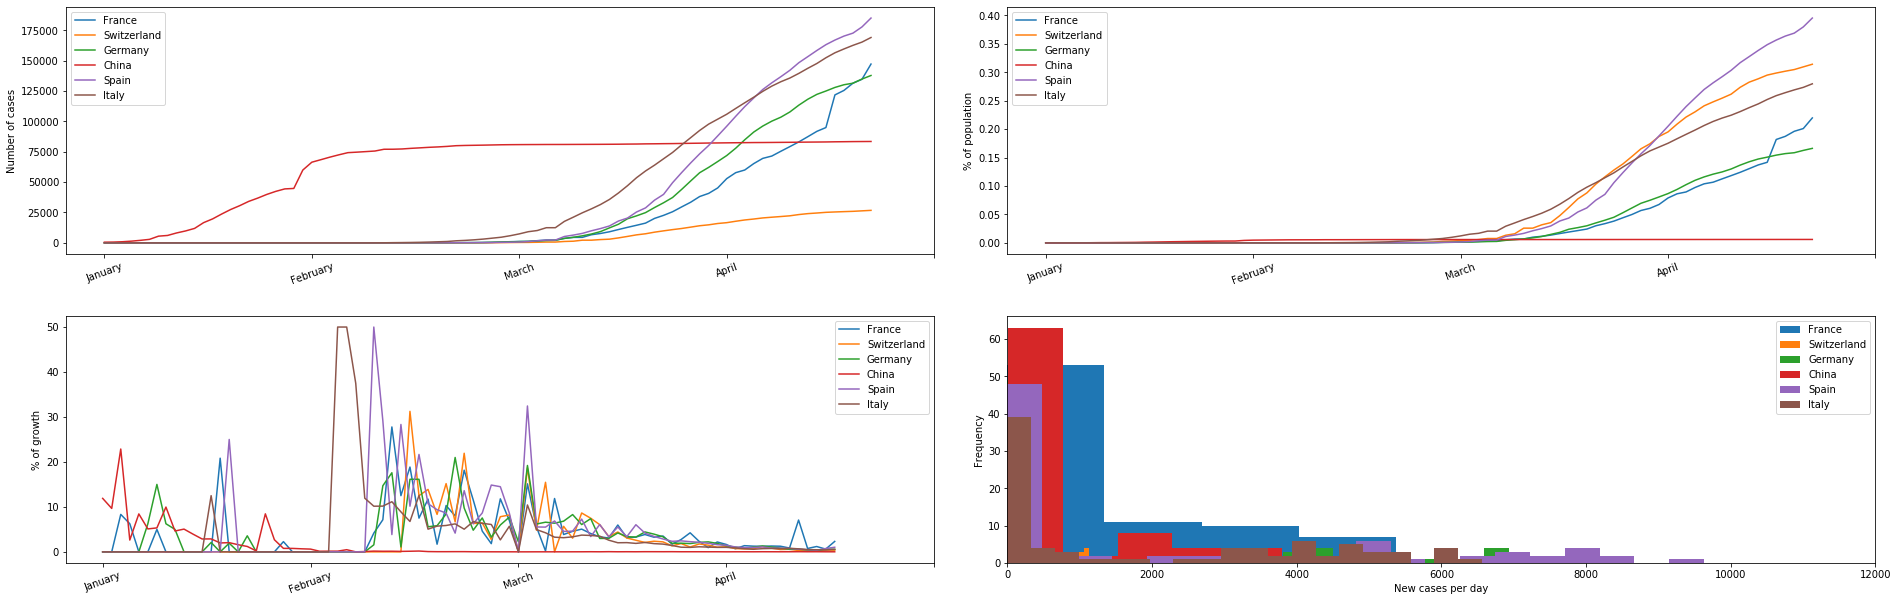

In [96]:
countries = ['France','Switzerland','Germany','China','Spain','Italy']

fig = plt.figure(figsize=(27,9))
plt.subplot(221)
for country in countries:
    toplot = country_data.loc[country,:]
    plt.plot(toplot)
plt.legend(countries)
plt.xticks(np.linspace(0,len(allData.columns)-1,5), calendar.month_name[1:5], rotation=20)
plt.ylabel('Number of cases')
plt.subplot(222)
for country in countries:
    toplot = country_data.loc[country,:]/allData.loc[country,'SP.POP.TOTL']*100
    plt.plot(toplot)
plt.legend(countries)
plt.xticks(np.linspace(0,len(allData.columns)-1,5), calendar.month_name[1:5], rotation=20)
plt.ylabel('% of population')
plt.subplot(223)
for country in countries:
    toplot = []
    for time in range(len(country_data.columns)-4):
        if country_data.loc[country,country_data.columns[time]] != 0:
            for flat in range(0,4): 
                meanGrowth = 0
                Growth = (country_data.loc[country,country_data.columns[time+1+flat]]/
                      country_data.loc[country,country_data.columns[time+flat]] - 1)*100
                meanGrowth = meanGrowth + Growth
                if meanGrowth > 200:
                    meanGrowth = 200
            toplot.append(meanGrowth/4)
        else:
            toplot.append(0)
    plt.plot(toplot)
plt.legend(countries)
plt.xticks(np.linspace(0,len(allData.columns)-1,5), calendar.month_name[1:5], rotation=20)
plt.ylabel('% of growth')
plt.subplot(224)
for country in countries:
    toplot = []
    for time in range(len(country_data.columns)-1):
        toplot.append(country_data.loc[country,country_data.columns[time+1]]-
        country_data.loc[country,country_data.columns[time]])
    plt.hist(toplot,bins=20)
plt.legend(countries)
plt.xlim([0,12000])
#plt.xticks(np.linspace(0,len(allData.columns)-1,5), calendar.month_name[1:5], rotation=20)
plt.ylabel('Frequency')
plt.xlabel('New cases per day')
fig.tight_layout(pad=3.0)
plt.show()


b. all countries

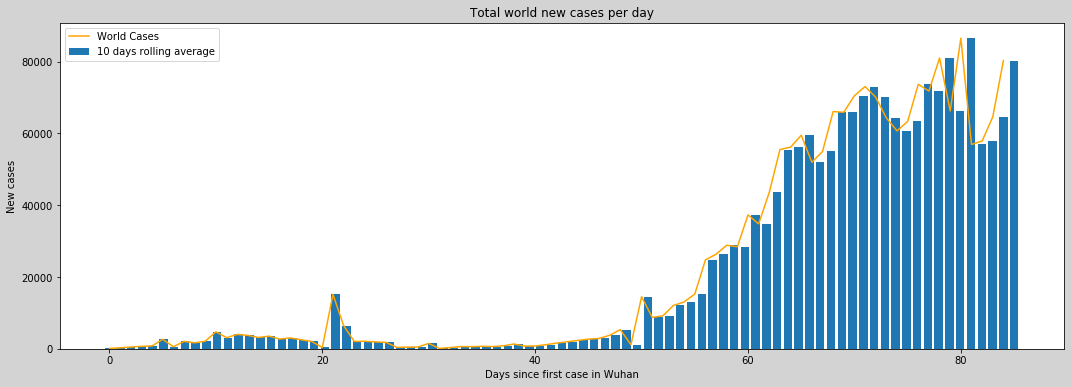

In [97]:
#Bar plot of the new cases
fig = plt.figure(figsize=[18,6])
graph = []
graph2 = []
for time in range(len(country_data.columns)-1):
    value = 0
    for country in allData.index:
        toplot = (country_data.loc[country,country_data.columns[time+1]]-country_data.loc[country,country_data.columns[time]])
        value = value  + toplot
    graph.append(value)
date = pd.date_range(start="2020-02-22",end="2020-04-16")
plt.bar(np.linspace(0,len(graph),len(graph)),np.asarray(graph))
plt.title('Total world new cases per day')
fig.set_facecolor('lightgrey')
plt.ylabel('New cases')
plt.xlabel('Days since first case in Wuhan')
plt.legend('World Cases')
for time in range(len(country_data.columns)-10):
    for country in allData.index:
        for flat in range(0,10):
            toplot = (country_data.loc[country,country_data.columns[time+1+flat]]-country_data.loc[country,country_data.columns[time+flat]])
            value = value  + toplot
        graph2.append(value/10)
plt.plot(graph,color='orange')
plt.legend(['World Cases','10 days rolling average'])
plt.show()

c. Geographical repartion

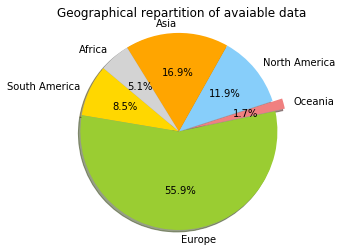

In [115]:
Continents = allData.loc[:,'Continent'].unique()
count = []
for continent in Continents:
    condObj = allData.apply(lambda x: True if x['Continent'] == continent else False, axis =1)
    count.append(len(condObj[condObj == True].index))
    

# Data to plot
labels = Continents
sizes = count
colors = ['gold', 'yellowgreen', 'lightcoral', 'lightskyblue','orange','lightgrey']
explode = (0, 0, 0.1, 0, 0, 0)  # explode 1st slice

# Plot
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
autopct='%1.1f%%', shadow=True, startangle=140)
plt.title('Geographical repartition of avaiable data')
plt.axis('equal')
plt.show()

### Splitting the predictors and target

In [180]:
y = allData.drop(['NY.GDP.MKTP.CD', 'SI.POV.GINI', 'Democracy index (EIU)', 'SP.POP.TOTL', 'SH.MED.BEDS.ZS', 'EN.POP.DNST', 'NE.TRD.GNFS.ZS','Continent'],axis = 1)
X = allData.loc[:,['NY.GDP.MKTP.CD', 'SI.POV.GINI', 'Democracy index (EIU)', 'SP.POP.TOTL', 'SH.MED.BEDS.ZS', 'EN.POP.DNST', 'NE.TRD.GNFS.ZS','Continent']]

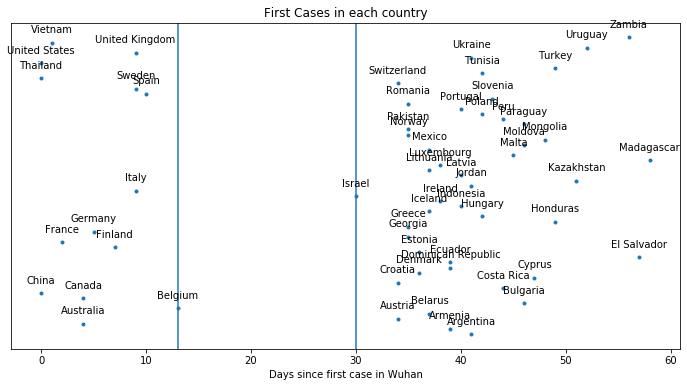

In [181]:

nonZero = []
for country in y.index:
    for date in y.columns:
        if y.loc[country,date] != 0:
            index = y.columns.get_loc(date)
            nonZero.append(index)
            break

fig = plt.figure(figsize=[12,6])
plt.plot(nonZero,y.index,'.')
plt.yticks([])
plt.title('First Cases in each country')
plt.xlabel('Days since first case in Wuhan')

for x,y in zip(nonZero,y.index):

    label = y

    plt.annotate(label, # this is the text
                 (x,y), # this is the point to label
                 textcoords="offset points", # how to position the text
                 xytext=(0,10), # distance from text to points (x,y)
                 ha='center')

plt.axvline(x = 13)
plt.axvline(x = 30)
plt.show()

In [164]:
y.index

<function str.index>